## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary: 

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [1]:
!head Data/countries_info.csv

country_name,area,population,literacy
afghanistan,647500,31056997,"36,0"
albania,28748,3581655,"86,5"
algeria,2381740,32930091,"70,0"
argentina,2766890,39921833,"97,1"
armenia,29800,2976372,"98,6"
australia,7686850,20264082,"100,0"
austria,83870,8192880,"98,0"
azerbaijan,86600,7961619,"97,0"
bahrain,665,698585,"89,1"


In [2]:
import pandas as pd
%matplotlib inline

DATA_FOLDER = 'Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.csv"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [60]:
happiness = pd.read_csv(HAPPINESS_DATASET, index_col='country')
countries = pd.read_csv(COUNTRIES_DATASET, index_col='country_name')
# keep lower_case
happiness.index = happiness.index.str.lower()
countries.index = countries.index.str.lower()
# change literacy to float
countries['literacy'] = countries['literacy'].str.replace(',','.').astype(float)
print("--- Countries Dataset")
print(countries.head())
print("--- Happiness Dataset")
print(happiness.head())

--- Countries Dataset
                 area  population  literacy
country_name                               
afghanistan    647500    31056997      36.0
albania         28748     3581655      86.5
algeria       2381740    32930091      70.0
argentina     2766890    39921833      97.1
armenia         29800     2976372      98.6
--- Happiness Dataset
             happiness_score  social_support  healthy_life_expectancy  \
country                                                                 
afghanistan           2.5669        0.470367                52.590000   
albania               4.8827        0.671070                68.708138   
algeria               5.0051        0.803385                65.905174   
argentina             5.9747        0.900568                68.803802   
armenia               4.6768        0.757479                66.750656   

             freedom_of_choices  generosity  perception_of_corruption  \
country                                                        

## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify that all the rows are in the final dataframe.

In [61]:
country_features = pd.merge(countries, happiness, 'inner', left_index=True, right_index=True)
country_features.head()

,area,population,literacy,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
country_name,,,,,,,,,,
afghanistan,647500,31056997,36.0,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
albania,28748,3581655,86.5,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
algeria,2381740,32930091,70.0,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
argentina,2766890,39921833,97.1,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
armenia,29800,2976372,98.6,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States


## Task 3: Where are people happier?

Print the top 10 countries based on their happiness score (higher is better).

In [62]:
country_features['happiness_score'].sort_values(ascending=False).head(10).index

Index(['finland', 'denmark', 'switzerland', 'iceland', 'norway', 'netherlands',
       'sweden', 'new zealand', 'austria', 'luxembourg'],
      dtype='object', name='country_name')

We are interested to know in what world region people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of contries for each world region.
Sort the result to show the happiness ranking.

In [63]:
country_features.groupby('world_region').agg(average_happiness=('happiness_score', 'mean'), count=('happiness_score', 'count')).sort_values(by='average_happiness', ascending=False)

,average_happiness,count
world_region,,
North America and ANZ,7.173525,4
Western Europe,6.967405,20
Latin America and Caribbean,5.971280,20
Central and Eastern Europe,5.891393,14
Southeast Asia,5.517788,8
East Asia,5.483633,3
Commonwealth of Independent States,5.358342,12
Middle East and North Africa,5.269306,16
Sub-Saharan Africa,4.393856,32


The first region has only a few countries! What are them and what is their score?

In [64]:
country_features.index[country_features['world_region']=='North America and ANZ']

Index(['australia', 'canada', 'new zealand', 'united states'], dtype='object', name='country_name')

## Task 4: How literate is the world?

Print the names of the countries with a level of literacy of 100%. 

For each country, print the name and the world region in the format: *{region name} - {country name} ({happiness score})*

In [75]:
for country_name, row in country_features.query('literacy == 100.0').iterrows():
    print(f"{row['world_region']} - {country_name} ({row['happiness_score']})")

North America and ANZ - australia (7.222799778)
Western Europe - denmark (7.645599842)
Western Europe - finland (7.808700085)
Western Europe - luxembourg (7.237500191)
Western Europe - norway (7.487999916000001)


What is the global average?

In [76]:
country_features['literacy'].mean()

np.float64(81.85112781954888)

Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [83]:
print(f"{len(country_features.query('literacy < 50.0'))/len(country_features)*100:.2f}%")

11.85%


Print the raw number and the percentage of world population that is illiterate.

In [90]:
print(f"Number of illterate population in the world : {(country_features['population']*(100-country_features['literacy'])/100).sum()} or {(country_features['population']*(100-country_features['literacy'])/100).sum()/country_features['population'].sum()*100:.2f}%")

Number of illterate population in the world : 1249372988.1030002 or 20.33%


## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [91]:
country_features['population_density'] = country_features['population']/country_features['area']

What is the happiness score of the 3 countries with the lowest population density?

In [93]:
# Write your code here
country_features.sort_values(by='population_density')['happiness_score'].head(3)

country_name
mongolia     5.4562
australia    7.2228
botswana     3.4789
Name: happiness_score, dtype: float64

## Task 6: Healty and happy?

Plot in a scatter plot the happiness score (x) and healty life expectancy (y).

<Axes: xlabel='happiness_score', ylabel='healthy_life_expectancy'>

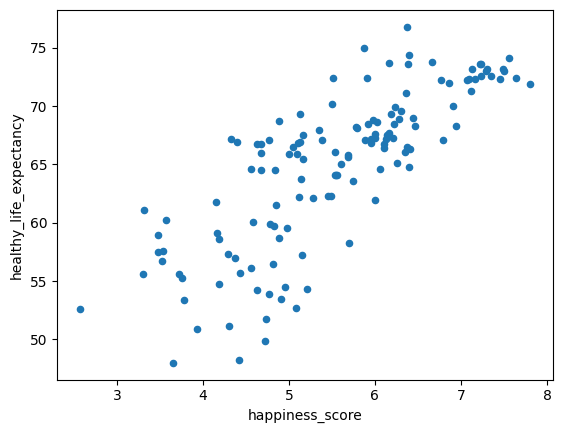

In [100]:
country_features.plot(x='happiness_score', y='healthy_life_expectancy', kind='scatter')

Feel free to continue the exploration of the dataset! We'll release the solutions next week.

----
Enjoy EPFL and be happy, next year Switzerland must be #1.